# Setting up a basic ReAct Agent in LangGraph

In [3]:
import os

os.environ["OPENAI_API_KEY"] = 'sk-***'
os.environ["SERPAPI_API_KEY"] = 's***'  # https://serpapi.com for a free token!

In [2]:
from langchain_community.agent_toolkits.load_tools import load_tools
tools = load_tools(["serpapi"])


/Users/sinanozdemir/Teaching/Pearson/oreilly-ai-agents/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tools[0].run('Sinan Ozdemir')

'["Sinan Ozdemir is an AI expert, educator, and entrepreneur with an master\'s degree in pure mathematics from Johns Hopkins University, where he also lectured. ...", \'Sinan Ozdemir type: Author.\', \'Sinan Ozdemir entity_type: people.\', \'Sinan Ozdemir kgmid: /g/11hcjs9cr6.\', \'Specialized in areas including time management as well as mathematics and computer science logistics.\', \'Helping companies leverage AI technology to solve complex problems. Founder, author, and consultant specializing in AI, LLMs, and data science.\', \'Data Scientist + Author + Entrepreneur. Check out my new book on LLMs on Amazon (Top 10 in AI/NLP) - sinanuozdemir.\', \'Sinan Ozdemir (@Prof_OZ) - Posts - NLP + Gen AI Expert / LLM whisperer AI Author Founder @Aikylie (acquired) Contributor on ... | X (formerly Twitter)\', "A beginner\'s guide to essential math and coding skills for data fluency and machine learning by Sinan Ozdemir", \'Sinan is a former lecturer of Data Science at Johns Hopkins University

# Use [Ollama](https://ollama.com/) for local inference

In [7]:
!python -m pip uninstall -y browser-use

Found existing installation: browser-use 0.1.41
Uninstalling browser-use-0.1.41:
  Successfully uninstalled browser-use-0.1.41


In [8]:
!python -m pip install -qU langchain-ollama langgraph


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [9]:
!ollama pull llama3.1

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling 667b0c1932bc: 100% ▕██████████████████▏ 4.9 GB                         
pulling 948af2743fc7: 100% ▕██████████████████▏ 1.5 KB                         
pulling 0ba8f0e314b4: 100% ▕██████████████████▏  12 KB                         
pulling 56bb8bd477a5: 100% ▕██████████████████▏   96 B                         
pulling 455f34728c9b: 100% ▕██████████████████▏  487 B                         
verifying sha256 digest 
writing manifest 
success 


In [14]:
from langgraph.prebuilt import create_react_agent
from langchain_ollama import ChatOllama
from datetime import datetime

today = datetime.today().strftime("%B ") + str(datetime.today().day) + ("th" if 11<=datetime.today().day<=13 else {1:"st",2:"nd",3:"rd"}.get(datetime.today().day%10,"th")) + datetime.today().strftime(", %Y")
print(today)

llm = ChatOllama(
    model="llama3.1",
    temperature=1
)
agent_executor = create_react_agent(llm, tools, state_modifier=f'Today is {today}')  # true as of today :)

November 12th, 2025


In [15]:
response = agent_executor.invoke({"messages": [("user", "Who is the current Ravens QB?")]})

In [16]:
response['messages'][-1].content

'The current Ravens QB is Lamar Jackson.'

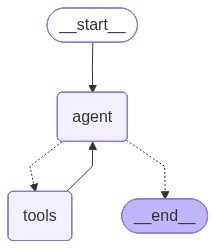

In [17]:
# Compile the graph
from IPython.display import Image, display

display(Image(agent_executor.get_graph().draw_mermaid_png()))